## Практическая работа 2

### Задание 1. Минимизация гладкой функции

Рассмотрим все ту же функцию из задания по линейной алгебре, но немного видоизменим ее для демонстрации: 

`f(x) = 4.2 * cos((x - 1) * pi / 6) * np.exp(x / 100.) + 13.7`

В первом задании вам необходимо найти минимум этой функции на промежутке с помощью `scipy.optimize`. 

1. Напишите на Питоне функцию, вычисляющую значение `f(x)` по известному `x`.
2. Попробуйте найти минимум, используя стандартные параметры функции `scipy.optimize.minimize` (т.е. задав только функцию и начальное приближение). 
3. Попробуйте менять начальное приближение и изучить, меняется ли результат.
4. Укажите в `scipy.optimize.minimize` в качестве метода `BFGS` (один из самых точных в большинстве случаев градиентных методов оптимизации), запустите из начального приближения `x = -50`. Градиент функции при этом указывать не нужно – он будет оценен численно. Теперь измените начальное приближение на `x = 50`.

Почему ответ отличается в зависимости от начального приближения?

In [47]:
import numpy as np
from scipy.optimize import minimize

def f(x):
    return 4.2 * np.cos((x - 1) * np.pi / 6) * np.exp(x / 100.) + 13.7

x = np.arange(-5, 5, 0.1)
print('Grad \n', minimize(f, 0))
print('BFGS x = -50\n', minimize(f, -50, method = 'BFGS'))
print('BFGS x = 50\n', minimize(f, 50, method = 'BFGS'))


Grad 
       fun: 9.704107764481353
 hess_inv: array([[0.91359742]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 3
     njev: 6
   status: 0
  success: True
        x: array([-4.96352874])
BFGS x = -50
       fun: 11.227408249213955
 hess_inv: array([[1.47413926]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([-52.96352896])
BFGS x = 50
       fun: 6.419009633327943
 hess_inv: array([[2.83721598]])
      jac: array([1.90734863e-06])
  message: 'Optimization terminated successfully.'
     nfev: 10
      nit: 2
     njev: 5
   status: 0
  success: True
        x: array([55.03647216])


### Задание 2. Дифференциальная эволюция

Теперь попробуйте применить к той же функции `f(x)` [метод дифференциальной эволюции](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html).

Обратите внимание, что границы значений аргументов функции представляют собой список кортежей. Даже если у вас функция одного аргумента, вложите его в список, т.к. в реализации `scipy.optimize.differential_evolution` длина этого списка используется для определения числа аргументов функции.

1. Запустите поиск минимума функции `f(x)` с помощью дифференциальной эволюции на промежутке `[-50, 50]`.
2. Сравните количество итераций BFGS для нахождения минимума, с количеством итераций дифференциальной эволюции (при повторных запусках число итераций может меняться). 

Учтите, что в дифференциальной эволюции за одну итерацию требуется выполнить гораздо больше действий, чем в BFGS. Например, можно обратить внимание на количество вычислений значения функции (`nfev`). Кроме того, время работы дифференциальной эволюции растет с увеличением числа аргументов функции.

In [ ]:
def f(x):
    return 4.2 * np.cos((x - 1) * np.pi / 6) * np.exp(x / 100.) + 13.7

In [31]:
from scipy.optimize import differential_evolution


#x = np.arange(-50, 50, 0.5)
#y = [lambda x: f(x)]

print(differential_evolution(f, ((-50, 50),)))

     fun: array([7.24234084])
     jac: array([-1.77635669e-07])
 message: 'Optimization terminated successfully.'
    nfev: 126
     nit: 7
 success: True
       x: array([43.03647111])


### Задание 3. Минимизация негладкой функции

Теперь рассмотрим функцию `h(x) = int(f(x))` на том же отрезке `[-50, 50]`, т.е. теперь каждое значение `f(x)` приводится к типу `int` и функция принимает только целые значения.
Такая функция будет негладкой, а ее график будет иметь ступенчатый вид. 

1. Постройте график `h(x)`.
2. Найдите минимум функции `h(x)` с помощью BFGS, взяв в качестве начального приближения `x = 50`.
3. Теперь найдите минимум `h(x)` на отрезке `[-50, 50]` с помощью дифференциальной эволюции.

Почему минимум, найденный BFGS, именно такой?

In [53]:
def f(x):
    return np.int32(4.2 * np.cos((x - 1) * np.pi / 6) * np.exp(x / 100.) + 13.7)

      fun: 19
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 2
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([48.])


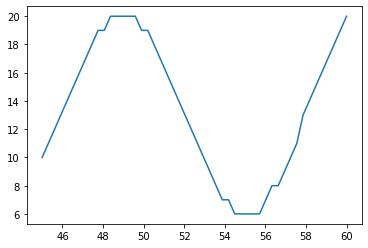

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.optimize import minimize

x = np.linspace(45, 60)
plt.plot(x, np.int32(f(x)))

print(minimize(f, 48, method = 'BFGS'))

In [45]:
from scipy.optimize import differential_evolution


print(differential_evolution(f, ((-50, 50),)))

     fun: 7.0
 message: 'Optimization terminated successfully.'
    nfev: 167
     nit: 10
 success: True
       x: array([42.39947034])
